# 5 Oct 23 - Activity: Solving PDEs in Spherical Coordinates

We can extend the ideas we developed from Separation of Variables to solve PDEs in spherical coordinates. We propose a similar solution to the one we used for Cartesian coordinates, functions of a single variable.

$$V(r,\theta,\phi) = R(r) \Theta(\theta) \Phi(\phi)$$

We have [shown that we can solve this problem in general](../../assets/notes/Notes-Separation_of_Variables_Spherical.pdf). We will now apply this to a specific problem. Recall these general solutions are written in the following ways:

$$R(r) = A r^n + \frac{B}{r^{n+1}}$$

$$\Theta(\theta) = P^m_l(\cos\theta)$$

$$\Phi(\phi) = e^{i m \phi}$$

where $P^m_l(\cos\theta)$ are the [associated Legendre polynomials](https://en.wikipedia.org/wiki/Associated_Legendre_polynomials). So that the general solution is the product of these for different values of $n$, $l$, and $m$. One solution is some combination of $n$, $l$, and $m$, written like this:

$$V_{nlm}(r,\theta,\phi) = \left(A_{nlm} r^n + \frac{B_{nlm}}{r^{n+1}}\right) P^m_l(\cos\theta) e^{i m \phi}$$

where $A_{nlm}$ and $B_{nlm}$ are constants. Because Laplace's equation is linear, we can write the general solution as a sum of these solutions:

$$V(r,\theta,\phi) = \sum_{n=0}^\infty \sum_{l=0}^\infty \sum_{m=-l}^l \left(A_{nlm} r^n + \frac{B_{nlm}}{r^{n+1}}\right) P^m_l(\cos\theta) e^{i m \phi}$$

## Visualizing the Solutions

One of the major challenges with these general solutions is seeing what the solutions look like. We can use these picture to help us dtermine if we can remove one or more terms before trying to match boundary conditions. We will plot each of the solutions below with respect to their relative variables.

### Radial Solutions

Below, we are plotting the solutions $r^n$ and $r^{-(n+1)}$ for several choices of $n$. You can see where the solutions blow up. This is helpful for matching boundary conditions.

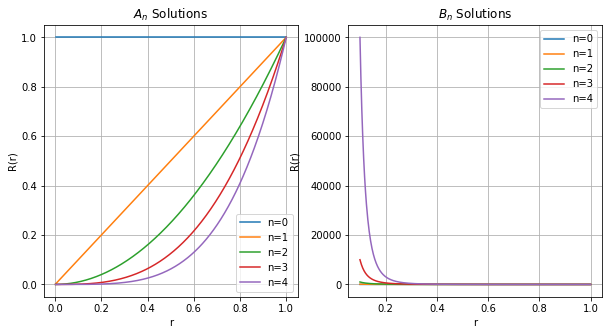

In [1]:
import matplotlib.pyplot as plt
import numpy as np

max_n = 4
step = 500
max_x = 1
start_x = max_x/step

# Radial coordinate
r = np.linspace(start_x, max_x, step)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title(r'$A_n$ Solutions')
plt.xlabel('r')
plt.ylabel('R(r)')

for n in range(max_n + 1):
    radial_solution = r**n
    plt.plot(r, radial_solution, label=f'n={n}')

plt.legend()
plt.grid(True)


max_n = 4
step = 500
max_x = 1
start_x = 0.1

# Radial coordinate
r = np.linspace(start_x, max_x, step)

plt.subplot(1,2,2)
plt.title(r'$B_n$ Solutions')
plt.xlabel('r')
plt.ylabel('R(r)')

for n in range(max_n + 1):  # for negative n

    radial_solution = 1/(r**(n+1))
    plt.plot(r, radial_solution, label=f'n={n}')

plt.legend()
plt.grid(True)

## The Polar Angle Solutions

These solutions are the associated Legendre Polynomials, presented below. 

$$P_l^m(\cos\theta)$$

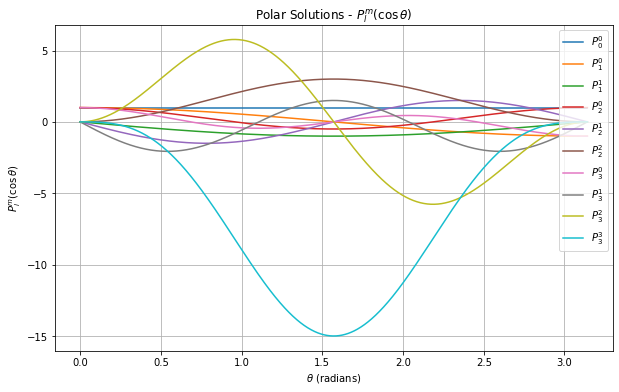

In [2]:
from scipy.special import lpmv

theta = np.linspace(0, np.pi, 1000)  # theta from 0 to pi
x = np.cos(theta)  # x = cos(theta)

# Define a set of (l, m) pairs to plot
lm_pairs = [(0, 0), (1, 0), (1, 1), (2, 0), (2, 1), (2, 2), (3, 0), (3, 1), (3, 2), (3, 3)]

plt.figure(figsize=(10,6))
for l, m in lm_pairs:
    if m <= l:  # The associated Legendre functions are only defined for m <= l
        plt.plot(theta, lpmv(m, l, x), label=f'$P_{{{l}}}^{{{m}}}$')

plt.title(r'Polar Solutions - $P_l^m(\cos\theta)$')
plt.xlabel(r'$\theta$ (radians)')
plt.ylabel(r'$P_l^m(\cos\theta)$')
plt.legend(loc='upper right')
plt.grid(True)


### The Azimuthal Angle Solutions

These solutions are the exponential functions, presented below.

$$e^{i m \phi}$$

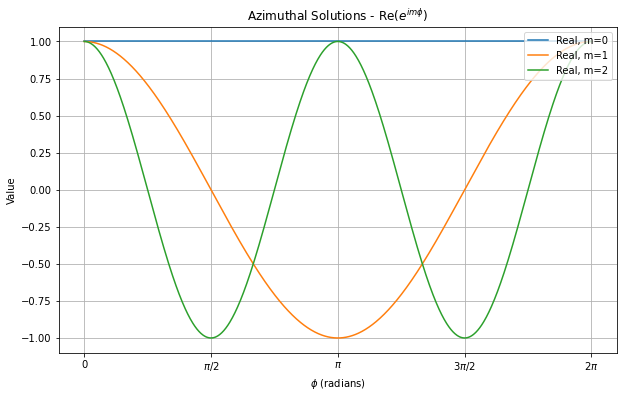

In [3]:
# Define phi from 0 to 2*pi
phi = np.linspace(0, 2 * np.pi, 1000)

# Define a set of m values to plot
m_values = [0, 1, 2]

plt.figure(figsize=(10,6))
plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi], ['0', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$'])

# Plot the real and imaginary parts of e^(im*phi) for different m values
for m in m_values:
    plt.plot(phi, np.cos(m * phi), linestyle='-', label=f'Real, m={m}')

plt.title('Azimuthal Solutions - Re($e^{im\phi}$)')
plt.xlabel(r'$\phi$ (radians)')
plt.ylabel('Value')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


## Azimuthally Symmetric Solutions

In the case of azimuthally symmetric solutions, the potential is independent of $\phi$ and the solutions are of the form:

$$V(r,\theta) = \sum_{n=0}^\infty \sum_{l=0}^\infty \left(A_{nl} r^n + \frac{B_{nl}}{r^{n+1}}\right) P_l(\cos\theta)$$

where $P_l(\cos\theta)$ are the [Legendre polynomials](https://en.wikipedia.org/wiki/Legendre_polynomials). The solutions are plotted below, but this time in 2D. You can imagine those solutions spun around the z-axis. We will exclusively use these solutions for the remainder of this activity because they make visualization easier.

We can see here why $P_0$ is the only solution for a perfectly spherical charge distribution. The other solutions are not spherically symmetric. It's also possible to see where the dipole moment is in the $P_1$ solution; notice it's spread out a bit.
    

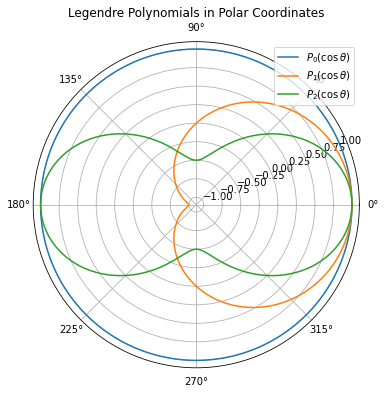

In [4]:
from scipy.special import legendre

theta = np.linspace(0, 2 * np.pi, 1000)
x = np.cos(theta)

# Define a set of l values to plot
l_values = [0, 1, 2]

plt.figure(figsize=(10,6))

# Create a polar subplot
ax = plt.subplot(111, projection='polar')

for l in l_values:
    # Generate Legendre Polynomial
    P_l = legendre(l)
    # Evaluate the polynomial at x = cos(theta)
    y = P_l(x)
    ax.plot(theta, y, label=f'$P_{l}(\cos \\theta)$')

ax.set_title('Legendre Polynomials in Polar Coordinates')
ax.legend(loc='upper right')

plt.show()


## Matching Boundary Conditions and Plotting the Potential

**&#9989; Do this** 

### Sphere of constant surface potential

Consider a sphere of with a radius $a$. If the potential on the surface is $V_0$, what is the potential inside and outside the sphere?

1. Consider the radial solutions (what doesn't blow up?)
2. Consider the polar angle solutions, what has to be true? What does that say about terms with $l>0$?
3. Write down the solution inside and outside the sphere.
4. Make a heat map plot (in $x$ and $y$) of the potential inside and outside the sphere. You can set $a=1$ and $V_0=1$ if that helps.

In [5]:
## your code here